<a href="https://colab.research.google.com/github/thalesvalente/teaching/blob/main/formal-languages-and-automata/1-lessons/slides-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Professor:** Dr. [Thales Levi Azevedo Valente], Universidade de Federal do Maranhão  
**Disciplina:** Engenharia da Computação - Inteligência Artificial  
**Assunto:** Atividades de Algoritmos de Busca
**Instruções:**
- Entregar pelo sigaa
- Nome do arquivo deve ser o "nome_sobrenome_{ultima letra do nome}.ipynb"
- Criar seus próprios nomes de variáveis ou funções. Códigos idênticos serão eliminados!!!

# 0 - Conceitos Introdutórios de Grafos

### Slide 48 - Definição de Grafo

Um **grafo** é um par ordenado $(V, A)$, onde:
- $V$ é o conjunto de **vértices** (ou nós) do grafo.
- $A$ é a relação binária sobre $V$, que especifica os **arcos** (ou arestas) do grafo.

Vertices $v_i, v_j \in V$ tais que $(v_i, v_j) \in A$ são ditos adjacentes, significando que eles são conectados por um arco.

_**Exemplo de um Grafo**_

Considere o grafo $G_1$ representado textualmente e graficamente:

- $G_1 = (V_1, A_1)$
- $V_1 = \{0, 1, 2, 3\}$
- $A_1 = \{(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)\}$

Graficamente, o grafo $G_1$ pode ser representado com círculos denotando os vértices e linhas denotando os arcos entre eles. Infelizmente, não posso renderizar ou incluir imagens diretamente aqui, mas a representação seria um ponto para cada vértice conectado por linhas que representam os arcos especificados em $A_1$.

Cada vértice em $V_1$ é um ponto numerado de 0 a 3, e cada par em $A_1$ indica uma linha conectando dois vértices. Por exemplo, o par $(0, 1)$ representa uma linha conectando os vértices 0 e 1.


### Slide 49 - Grafo Orientado

**_Definição de Grafo Orientado_**

- Um grafo orientado, ou digrafo, é aquele em que os pares ordenados $(v_i, v_j) \in A$ representam arcos com uma direção específica, de $v_i$ para $v_j$.
- Em um grafo orientado:
  - Se $(v_i, v_j) \in A$, então $v_i$ é chamado de predecessor de $v_j$, e $v_j$ é chamado de sucessor de $v_i$.
- Considere o grafo orientado $G_2$:
  - $V_2 = \{0, 1, 2, 3\}$ representa o conjunto de vértices.
  - $A_2 = \{(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)\}$ representa o conjunto de arcos, indicando a direção da relação entre os vértices.

_**Grafo $G_2$**_

- Vértices: $V_2 = \{0, 1, 2, 3\}$
- Arcos: $A_2 = \{(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)\}$

### Slide 50 - Grafo Ordenado

Um grafo é considerado **ordenado** se existe uma relação de ordem pré-definida sobre os arcos que saem de cada vértice. No grafo $G_3$, temos:

- **Conjunto de Vértices**: $V_3 = \{a, b, c, d\}$
- **Conjunto de Arcos**: $A_3 = \{(a,b), (b,a), (a,c), (a,d), (c,b), (d,c), (c,d)\}$

A relação de ordem entre os arcos é dada por:
$$
(a,b) < (b,a) < (a,c) < (a,d) < (c,b) < (d,c) < (c,d)
$$

Isso significa que, para o vértice $a$, os arcos são ordenados da seguinte forma:
- Saindo de $a$: $(a,b)$, $(a,c)$, $(a,d)$

Para o vértice $b$:
- Saindo de $b$: $(b,a)$

Para o vértice $c$:
- Saindo de $c$: $(c,b)$, $(c,d)$

Para o vértice $d$:
- Saindo de $d$: $(d,c)$


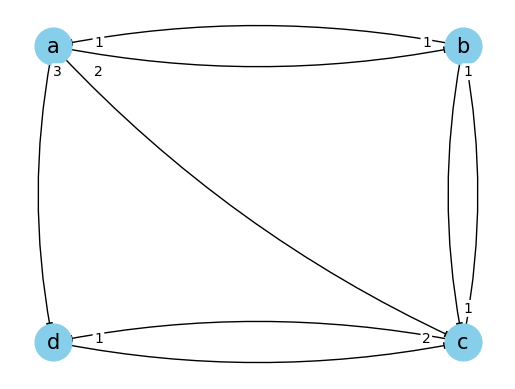

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
G = nx.MultiDiGraph()

# Adicionando vértices e arestas com pesos
G.add_edge('a', 'b', weight=1)
G.add_edge('b', 'a', weight=1)
G.add_edge('a', 'c', weight=2)
G.add_edge('a', 'd', weight=3)
G.add_edge('c', 'b', weight=1)
G.add_edge('d', 'c', weight=1)
G.add_edge('c', 'd', weight=2)
G.add_edge('b', 'c', weight=1)

# Definindo a posição dos vértices
pos = {'a': (0, 1), 'b': (1, 1), 'c': (1, 0), 'd': (0, 0)}

# Desenhando o grafo com arcos curvos para arestas bidirecionais
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=15)

# Desenhar as arestas com curvas suaves para distinguir as bidirecionais
for (u, v, key) in G.edges(keys=True):
    style = 'arc3, rad=0.1' if key == 0 else 'arc3, rad=-0.1'
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=style)

# [(Atribuicao) for variaveis in iteravel if condicao]
# Adicionando rótulos de aresta no início de cada aresta
## build edge_labels using for without list comprehension technique
edge_labels = {}
for u, v, d in G.edges(data=True):
    edge_labels[(u, v)] = d['weight']

edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
for (u, v), weight in edge_labels.items():
    # Define o deslocamento para mover os rótulos para perto do nó de origem
    edge_pos = pos[u]
    text_pos = (edge_pos[0] * 0.9 + pos[v][0] * 0.1, edge_pos[1] * 0.9 + pos[v][1] * 0.1)

    # Desenha os rótulos das arestas com fundo branco para melhor visibilidade
    plt.text(text_pos[0], text_pos[1], s=weight, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Mostrando o grafo
plt.axis('off')  # Desliga os eixos
plt.show()


### Slide 51 - Conceitos de Grafos Orientados

Em um grafo orientado, podemos definir conceitos importantes baseados nas conexões entre os vértices:

- **Ramificação de Saída ($N_S$)**: Número de arcos que partem de um vértice.
- **Ramificação de Entrada ($N_E$)**: Número de arcos que chegam a um vértice.
- **Vértices-base ou Vértices-raiz**: Vértices que não têm arcos chegando a eles ($N_E = 0$).
- **Vértices-folha**: Vértices que não têm arcos partindo deles ($N_S = 0$).

Considerando o grafo $G_3$, temos:

- Vértice $a$: Ramificação de Saída $N_S(a) = 3$, Ramificação de Entrada $N_E(a) = 1$
- Vértice $b$: Ramificação de Saída $N_S(b) = 1$, Ramificação de Entrada $N_E(b) = 2$
- Vértice $c$: Ramificação de Saída $N_S(c) = 2$, Ramificação de Entrada $N_E(c) = 2$
- Vértice $d$: Ramificação de Saída $N_S(d) = 1$, Ramificação de Entrada $N_E(d) = 2$

Desta forma, no grafo $G_3$, não temos vértices-base ou vértices-folha, pois todos os vértices têm pelo menos uma ramificação de saída e uma de entrada.


In [ ]:
# Função para encontrar vértices-base/raiz e vértices-folha
def find_root_and_leaf_nodes(G):
    root_nodes = [node for node, deg in G.in_degree() if deg == 0]
    leaf_nodes = [node for node, deg in G.out_degree() if deg == 0]
    return root_nodes, leaf_nodes

# Encontrar e imprimir os vértices-base/raiz e vértices-folha
root_nodes, leaf_nodes = find_root_and_leaf_nodes(G3)
print(f'Vertices-base/raiz: {root_nodes}')
print(f'Vertices-folha: {leaf_nodes}')

# Calcula a ramificação de saída e de entrada para cada vértice
ramificacao_saida = {node: G.out_degree(node) for node in G.nodes()}
ramificacao_entrada = {node: G.in_degree(node) for node in G.nodes()}

# Exibe as ramificações para cada vértice
print("Ramificação de Saída:", ramificacao_saida)
print("Ramificação de Entrada:", ramificacao_entrada)

NameError: name 'G3' is not defined

### Slide 52 - Caminhos e Ciclos em Grafos

Um **caminho** em um grafo é uma sequência de arcos que conectam uma série de vértices, começando no vértice inicial e terminando no vértice final, de tal forma que cada arco está diretamente conectado ao próximo.

Um **ciclo** é um caminho particular que começa e termina no mesmo vértice.

- **Caminho**: Para o grafo $G_3$, a sequência $(a, c)(c, b)$ é um caminho válido de comprimento 2.
- **Ciclo**: O grafo $G_3$ é cíclico, pois contém ciclos, por exemplo, $(a, b)(b, a)$.
- **Grafo Cíclico**: Um grafo é cíclico se contém pelo menos um ciclo.
- **Grafo Acíclico**: Um grafo é acíclico se não contém nenhum ciclo.


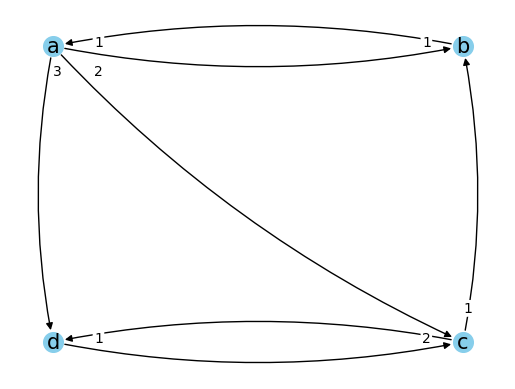

Caminhos de 'a' para 'b':
['a', 'b']
['a', 'c', 'b']
['a', 'd', 'c', 'b']
O grafo G3 é cíclico? Sim
Um ciclo em G3: [('a', 'b', 0), ('b', 'a', 0)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
G = nx.MultiDiGraph()

# Adicionando vértices e arestas com pesos
G.add_edge('a', 'b', weight=1)
G.add_edge('b', 'a', weight=1)
G.add_edge('a', 'c', weight=2)
G.add_edge('a', 'd', weight=3)
G.add_edge('c', 'b', weight=1)
G.add_edge('d', 'c', weight=1)
G.add_edge('c', 'd', weight=2)

# Definindo a posição dos vértices
pos = {'a': (0, 1), 'b': (1, 1), 'c': (1, 0), 'd': (0, 0)}

# Desenhando o grafo com arcos curvos para arestas bidirecionais
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=15)

# Desenhar as arestas com curvas suaves para distinguir as bidirecionais
for (u, v, key) in G.edges(keys=True):
    style = 'arc3, rad=0.1' if key == 0 else 'arc3, rad=-0.1'
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=style)

# Adicionando rótulos de aresta no início de cada aresta
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
for (u, v), weight in edge_labels.items():
    # Define o deslocamento para mover os rótulos para perto do nó de origem
    edge_pos = pos[u]
    text_pos = (edge_pos[0] * 0.9 + pos[v][0] * 0.1, edge_pos[1] * 0.9 + pos[v][1] * 0.1)

    # Desenha os rótulos das arestas com fundo branco para melhor visibilidade
    plt.text(text_pos[0], text_pos[1], s=weight, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Mostrando o grafo
plt.axis('off')  # Desliga os eixos
plt.show()

# Encontrando caminhos
print("Caminhos de 'a' para 'b':")
for path in nx.all_simple_paths(G, source='a', target='b'):
    print(path)

# Verificando a existência de ciclos
has_cycles = nx.is_directed_acyclic_graph(G)
print(f"O grafo G3 é cíclico? {'Não' if has_cycles else 'Sim'}")

# Identificando um ciclo (se houver)
try:
    cycle = nx.find_cycle(G)
    print("Um ciclo em G3:", cycle)
except nx.NetworkXNoCycle:
    print("G3 é acíclico.")


### Slide 53 - Grafo Rotulado

Um **grafo rotulado** é aquele em que seus vértices ou arcos têm rótulos associados que representam informações adicionais.

- **Rotulação de Vértices**: É uma função $f_V$ que associa cada vértice do conjunto $V$ a um rótulo do conjunto $R_V$.
- **Rotulação de Arcos**: É uma função $f_A$ que associa cada arco do conjunto $A$ a um rótulo do conjunto $R_A$.

_**Exemplo de Grafo Rotulado $G_4$**_:

Considere o grafo $G_4$:

- **Vértices**: $V_4 = \{0, 1, 2\}$
- **Arcos**: $A_4 = \{(0, 1), (1, 2), (0, 2)\}$

Uma possível rotulação para $G_4$ é:

- **Rotulação de Vértices**:
  $$
  f_V = \{(0, \phi), (1, \gamma), (2, \psi)\} \quad \text{com} \quad R_V = \{\phi, \gamma, \psi\}
  $$
- **Rotulação de Arcos**:
  $$
  f_A = \{((0, 1), \Phi), ((1, 2), \Gamma), ((0, 2), \Psi)\} \quad \text{com} \quad R_A = \{\Phi, \Gamma, \Psi\}
  $$


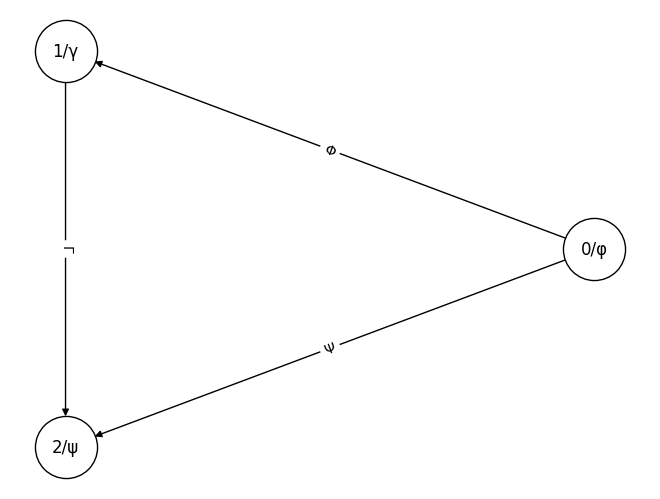

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
G4 = nx.DiGraph()

# Adicionando vértices e arestas do grafo G4
G4.add_edge('0', '1', label='Φ')
G4.add_edge('1', '2', label='Γ')
G4.add_edge('0', '2', label='Ψ')

# Rotulação dos vértices
vertex_labels = {'0': 'φ', '1': 'γ', '2': 'ψ'}
for node, label in vertex_labels.items():
    G4.nodes[node]['label'] = label

# Desenhando o grafo
pos = nx.circular_layout(G4)  # Posicionamento circular para os nós
nx.draw(G4, pos, with_labels=False, node_size=2000, node_color='white', edgecolors='black')

# Desenhando os rótulos dos vértices
for node, (x, y) in pos.items():
    plt.text(x, y, f'{node}/{G4.nodes[node]["label"]}', fontsize=12, ha='center', va='center')

# Desenhando os rótulos das arestas
edge_labels = nx.get_edge_attributes(G4, 'label')
nx.draw_networkx_edge_labels(G4, pos, edge_labels=edge_labels, font_color='black')

# Mostrando o grafo
plt.axis('off')  # Desliga os eixos
plt.show()


### Slides 54 a 59 - Árvores

_**Definição de Árvore**_

- Uma **árvore** é um grafo acíclico (sem ciclos) e orientado, onde:
  - Existe exatamente um vértice chamado **raiz** com $N_E=0$ (sem arestas de entrada).
  - Todos os outros vértices têm exatamente uma aresta de entrada ($N_E=1$).
  - Existe um único caminho de qualquer vértice para a raiz.

_**Conceitos em Árvores**_

- **Ancestral e Descendente**:
  - Se $a$ é ancestral de $b$, então é possível percorrer um caminho da raiz até $b$ passando por $a$.
  - Se $b$ é descendente de $a$, então $a$ vem antes de $b$ no caminho da raiz até $b$.

- **Pai e Filho**:
  - Se não houver vértices intermediários entre $a$ e $b$, e se $a$ é ancestral direto de $b$, então $a$ é o pai de $b$ e $b$ é o filho de $a$.

- **Folhas e Nós Internos**:
  - Vértices sem filhos são chamados de folhas.
  - Vértices com pelo menos um filho são chamados de nós internos.

- **Profundidade**:
  - A profundidade de um nó é o número de arestas no caminho da raiz até esse nó.

_**Exemplo**_

Considerando uma árvore com vértices nomeados como `Raiz`, `V1`, `V11`, `V00`, `V01`, `V0`, `V10`:
- `V1` é o pai de `V11`.
- `Raiz` é ancestral de todos os nós.
- `V00` e `V11` são folhas.
- `V0` e `V1` são nós internos.
- `V01` e `V10` têm profundidade 2.


In [ ]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando uma árvore
T = nx.DiGraph()

# Adicionando vértices e arestas
T.add_edges_from([
    ('Raiz', 'V0'),
    ('Raiz', 'V1'),
    ('V0', 'V00'),
    ('V0', 'V01'),
    ('V1', 'V10'),
    ('V1', 'V11'),
])

# Desenhando a árvore
pos = nx.nx_agraph.graphviz_layout(T, prog='dot')  # Usando o layout do Graphviz
nx.draw(T, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=False)

# Mostrando a árvore
plt.title("Árvore")
plt.show()


ImportError: requires pygraphviz http://pygraphviz.github.io/

In [ ]:
# Supondo que G seja o grafo definido anteriormente

# Função para encontrar a raiz, folhas, nós de entrada e saída
# FACA AQUI A IMPLEMENTACAO DA FUNCAO SEM USAR LIST COMPREHENSION, OU SEJA, USE LACOS FOR
# CRIE SEUS PROPRIOS NOMES DAS VARIAVEIS
def graph_properties(G):
    # Identificar se o grafo é acíclico
    is_acyclic = nx.is_directed_acyclic_graph(G)
    print(f"O grafo G é acíclico? {is_acyclic}")

    # Identificar a raiz (vértices com grau de entrada igual a zero)
    root = []
    for node, degree in G.in_degree():
        if degree == 0:
            root.append(node)
    print(f"Raiz do grafo: {root}")

    # Identificar as folhas (vértices com grau de saída igual a zero)
    leaves = []
    for node, degree in G.out_degree():
        if degree == 0:
            leaves.append(node)
    print(f"Folhas do grafo: {leaves}")

    # Calcular os graus de entrada e saída
    in_degrees = {}
    out_degrees = {}
    for node, degree in G.in_degree():
        in_degrees[node] = degree
    for node, degree in G.out_degree():
        out_degrees[node] = degree
    print(f"Graus de entrada: {in_degrees}")
    print(f"Graus de saída: {out_degrees}")

    return is_acyclic, root, leaves, in_degrees, out_degrees

properties = graph_properties(T)

- _**Identificando nós folha**_:  Para identificar os nós folha em um grafo usando a biblioteca NetworkX em Python, utilizamos a seguinte linha de código:

```python
leaves = [node for node, deg in G.out_degree() if deg == 0]
```
A linha de código em questão cria uma lista dos nós folha de um grafo `G`. Os nós folha são aqueles que não têm arestas saindo deles. Vamos decompô-la:

- `G.out_degree()`: Este método retorna um conjunto de pares (nó, grau de saída) para todos os nós no grafo `G`. O "grau de saída" é o número de arestas que saem de um nó.

- `[node for node, deg in G.out_degree() if deg == 0]`: Esta é uma compreensão de lista, uma forma concisa de construir uma lista em Python. O que ela faz é:
  - Iterar sobre cada par `(nó, grau de saída)` gerado por `G.out_degree()`.
  - Checar se o grau de saída (`deg`) é `0`, o que significa que não há arestas saindo desse nó.
  - Se o grau de saída for `0`, incluir o `nó` na lista `leaves`.

Portanto, `leaves` será uma lista contendo todos os nós do grafo `G` que são nós folha.  

  
- _**Identificando a raiz**_:  Para identificar a raiz em um grafo usando a biblioteca NetworkX em Python, utilizamos a seguinte linha de código:

```python
root = [node for node, deg in G.in_degree() if deg == 0]
```
A linha de código em questão cria uma lista dos nós raiz de um grafo `G`. Os nós folha são aqueles que não têm arestas entrando neles. Vamos decompô-la:

- `G.in_degree()`: Este método retorna um conjunto de pares (nó, grau de entrada) para todos os nós no grafo `G`. O "grau de entrada" é o número de arestas que entrasm em cada nó.

- `[node for node, deg in G.in_degree() if deg == 0]`: Esta é uma compreensão de lista, uma forma concisa de construir uma lista em Python. O que ela faz é:
  - Iterar sobre cada par `(nó, grau de entrada)` gerado por `G.in_degree()`.
  - Checar se o grau de entrada (`deg`) é `0`, o que significa que não há arestas entrandonesse nó.
  - Se o grau de entrada for `0`, incluir o `nó` na lista `root`.

Portanto, `root` será uma lista contendo todos os nós do grafo `G` que são nós raiz.

- _**Calculando Graus de Entrada e Saída em um Grafo**_:  Para calcular os graus de entrada e saída de cada nó em um grafo utilizando a biblioteca NetworkX, usamos as seguintes linhas de código:

```python
in_degrees = {node: deg for node, deg in G.in_degree()}
out_degrees = {node: deg for node, deg in G.out_degree()}
```
`G.in_degree()`: Este método retorna um iterador sobre os pares (nó, grau de entrada) para todos os nós no grafo `G`. O grau de entrada é o número total de arestas direcionadas para um nó.

`G.out_degree()`: Este método retorna um iterador sobre os pares (nó, grau de saída) para todos os nós no grafo `G`. O grau de saída é o número total de arestas que saem de um nó.

`{node: deg for node, deg in G.in_degree()}`: Esta é uma dictionary comprehension que cria um dicionário `in_degrees`, onde cada chave é um nó do grafo, e seu valor é o grau de entrada desse nó.

`{node: deg for node, deg in G.out_degree()}`: De forma semelhante, cria um dicionário `out_degrees`, onde cada chave é um nó do grafo, e seu valor é o grau de saída desse nó.

# 1. Algoritmos de Busca sem informação

## 1.1 Busca em Largura (BFS)

### 1.1.1 Introdução

A **Busca em Largura (BFS - *Breadth-First Search*)** é um dos algoritmos clássicos para percorrer ou buscar em grafos (ou árvores). Ela explora o grafo nível a nível, partindo de um nó inicial, visitando todos os seus vizinhos, depois todos os vizinhos destes vizinhos, e assim por diante.
  
**A) Principais características**
- A BFS caminha "amplamente" pelo grafo, explorando completamente todos os nós a uma certa distância antes de seguir para a próxima distância.
- Em termos de árvores, a BFS visita os nós nível por nível.
- É frequentemente utilizada para determinar o menor caminho em número de arestas de um nó inicial a outros nós em um grafo não ponderado.


**B) Motivação**  
Por que utilizar BFS?  
- Encontrar o caminho mais curto (em termos de quantidade de arestas) em um grafo não ponderado.
- Verificar se um grafo é bipartido.
- Explorar todos os nós a partir de um ponto inicial.
- Serve de base para outros algoritmos mais complexos, como o de fluxo máximo (quando combinada com outras técnicas, como a busca em rede de fluxo - Edmond-Karp).

**C) Definição do Problema**  
Dado um grafo G = (V, E), onde:
- V é o conjunto de vértices (nós),
- E é o conjunto de arestas.

E um vértice inicial `s` ∈ V. Queremos visitar todos os nós alcançáveis a partir de `s` expandindo nível a nível.  

---  

**D) Como funciona:**
1. Inicialmente, coloque o nó inicial `s` em uma fila.
2. Enquanto a fila não estiver vazia:
   - Remova o primeiro nó da fila, chame-o de `u`.
   - Visite `u` (se ainda não foi visitado).
   - Enfileire todos os vizinhos de `u` que ainda não tenham sido visitados.

### 1.1.2 Exemplo Intuitivo

Considere o seguinte grafo não dirigido:


- Vértices: {A, B, C, D, E}  
- Arestas: {(A,B), (A,C), (B,D), (C,E)}

Começando de A:
- Passo 1: Fila = [A], Visitados = {}
- Desenfileirar A: Visitados = {A}
- Enfileirar vizinhos de A: B e C
- Fila = [B, C]

- Passo 2: Desenfileirar B: Visitados = {A, B}
- Vizinhos de B: A (já visitado), D (não visitado)
- Enfileira D: Fila = [C, D]

- Passo 3: Desenfileirar C: Visitados = {A, B, C}
- Vizinhos de C: A (já visitado), E (não visitado)
- Enfileira E: Fila = [D, E]

- Passo 4: Desenfileirar D: Visitados = {A, B, C, D}
- Vizinhos de D: B (visitado)
- Nada novo a enfileirar: Fila = [E]

- Passo 5: Desenfileirar E: Visitados = {A, B, C, D, E}
- Vizinhos de E: C (visitado)
- Nada novo a enfileirar: Fila = []

A busca terminou. Ordem de visita: A → B → C → D → E.

---

Representação do Grafo  

---
A BFS pode ser aplicada em qualquer representação de grafo, mas as mais comuns são:

1. **Lista de Adjacência:**  
   - Cada nó possui uma lista de nós vizinhos.
   - Exemplo:  
     ```python
     graph = {
       'A': ['B', 'C'],
       'B': ['A', 'D'],
       'C': ['A', 'E'],
       'D': ['B'],
       'E': ['C']
     }
     ```

2. **Matriz de Adjacência:**  
   - Uma matriz NxN onde `mat[i][j]` indica se há uma aresta entre o nó i e o nó j.
   - Menos eficiente em grafos esparsos.

Para BFS, a lista de adjacência costuma ser mais eficiente.

---

**Complexidade do Algoritmo**

Suponha que o grafo tenha:
- |V| = n (nós)
- |E| = m (arestas)

A BFS visita cada vértice uma única vez e cada aresta no máximo duas vezes (em grafos não-dirigidos, uma vez para cada ponta; em grafos dirigidos, no máximo uma vez na direção indicada).

Portanto, o tempo de execução da BFS é **O(n + m)**.

Isto é ótimo, pois significa que a BFS é linear no tamanho do grafo.

Em termos de memória, a BFS necessita:
- Uma fila capaz de manter, no pior caso, O(n) elementos.
- Uma lista ou array de visitados de tamanho O(n).

Logo, a complexidade espacial também é O(n + m), dominada pela representação do grafo (lista de adjacência) e pela estrutura de fila e de marcação de visitados.

---

**Pseudocódigo**



# 2. Algoritmos de Busca com Informação

A **busca com informação** utiliza **heurísticas** (informações adicionais) para guiar a exploração do espaço de busca. A heurística ajuda a escolher os caminhos mais **promissores** primeiro, evitando explorar caminhos não relevantes.

## 2.1 Algoritmos Gulosos

1. Escolha Local Ótima
2. Não há Revisão de Decisões

### 2.1.1 Mochila Fracionária

---
---
**O algoritmo da mochila fracionária demonstra o uso do paradigma guloso escolhendo itens pela melhor razão valor/peso.**

---
---
**Descrição**: Dado um conjunto de itens, cada um com valor e peso, e uma capacidade máxima da mochila, o objetivo é maximizar o valor colocado dentro da mochila. É permitido pegar frações de itens. O algoritmo guloso consiste em:
- Calcular o valor/peso de cada item.
- Ordenar os itens pela razão valor/peso em ordem decrescente.
- Adicionar primeiro o item com melhor razão, depois o segundo, e assim por diante, até esgotar a capacidade da mochila.

**Após obter o resultado, mostrar graficamente**:
- A fração de cada item inserido na mochila.
    - Cada barra representa um item, a altura da barra indica a fração do item escolhido.
    - Pequenos rótulos acima das barras indicam a porcentagem do item escolhida.
- O valor total da solução.
    - O título mostra o valor total obtido

In [ ]:
import matplotlib.pyplot as plt

def fractional_knapsack(values, weights, capacity):
    # Cria uma lista de itens com as informações: (valor, peso, valor_por_peso, índice)
    # O índice é usado para rastrear o item original após a ordenação
    items = [(values[i] / weights[i], values[i], weights[i], i) for i in range(len(values))]

    # Ordena os itens pela razão valor/peso em ordem decrescente
    # A estratégia gulosa é pegar primeiro os itens com maior valor/peso
    items.sort(key=lambda i: i[0], reverse=True)

    # Inicializa o valor total coletado como 0
    total_value = 0.0
    # Inicializa a capacidade restante da mochila com o valor fornecido
    remaining_capacity = capacity
    # Inicializa uma lista para armazenar as frações escolhidas de cada item
    # Todas começam como 0 (nenhuma fração usada inicialmente)
    chosen_fractions = [0]*len(values)  # Para armazenar a fração escolhida de cada item

    # Itera sobre a lista ordenada de itens
    for ratio, value, peso, index in items:
        # Se o peso do item atual é menor ou igual à capacidade restante, pega o item inteiro
        if peso <= remaining_capacity:
            # Adiciona o valor total do item ao total_value
            total_value += value

            # Marca que 100% (fração 1) do item foi escolhido
            chosen_fractions[index] = 1

            # Reduz a capacidade restante da mochila
            remaining_capacity -= peso

        else:
            # Caso o item não caiba inteiro, pega apenas a fração que cabe
             # Fração que cabe na mochila
            fracao = remaining_capacity / peso

            # Adiciona o valor proporcional do item ao total_value
            total_value += value * fracao

            # Marca a fração escolhida para o item atual
            chosen_fractions[index] = fracao
            # A capacidade restante agora é 0, a mochila está cheia
            break  # mochila cheia

    # Retorna o valor total coletado e as frações de cada item escolhidas
    return total_value, chosen_fractions

# Exemplo de uso
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
result_value, fractions = fractional_knapsack(values, weights, capacity)

print("Valor máximo na mochila fracionária:", result_value)
# RESPOSTA ESPERADA
# Valor máximo na mochila fracionária: 240.0
print("Frações dos itens escolhidas:", fractions)
# RESPOSTA ESPERADA
# Frações dos itens escolhidas: [1, 1, 0.6666666666666666]
# Plot dos resultados


Valor máximo na mochila fracionária: 240.0
Frações dos itens escolhidas: [1, 1, 0.6666666666666666]


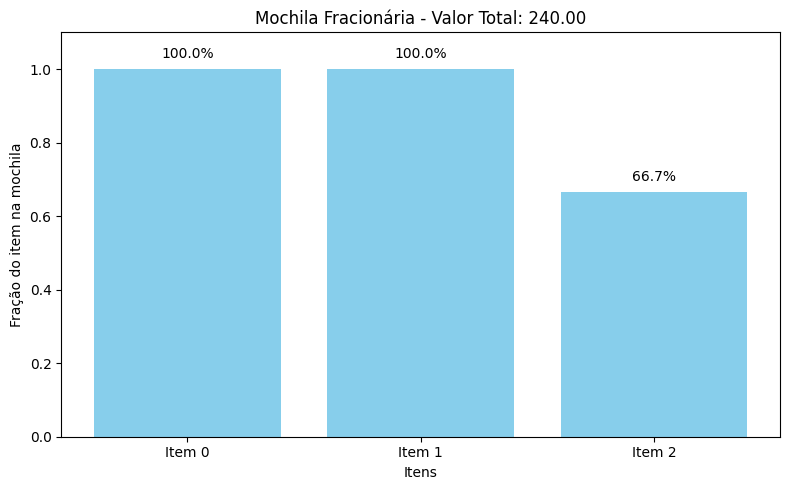

In [ ]:
plt.figure(figsize=(8,5))
indices = range(len(values))
plt.bar(indices, fractions, tick_label=[f"Item {i}" for i in indices], color='skyblue')
plt.xlabel('Itens')
plt.ylabel('Fração do item na mochila')
plt.title(f'Mochila Fracionária - Valor Total: {result_value:.2f}')
plt.ylim(0,1.1)
for i, frac in enumerate(fractions):
    plt.text(i, frac+0.03, f"{frac*100:.1f}%", ha='center')

plt.tight_layout()
plt.show()

Agora vamos resolver o problema recursivamente

In [ ]:
def fractional_knapsack_recursive(values, weights, capacity, index=0, chosen_fractions=None, items=None):
    """
    Resolve o problema da mochila fracionária recursivamente.
    :param values: Lista de valores dos itens.
    :param weights: Lista de pesos dos itens.
    :param capacity: Capacidade total da mochila.
    :param index: Índice do item atual.
    :param chosen_fractions: Lista para rastrear as frações escolhidas.
    :param items: Lista ordenada de itens (valor, peso, razão, índice).
    :return: Valor máximo obtido e as frações escolhidas.
    """
    # Caso base: sem mais itens ou capacidade
    if index >= len(items) or capacity <= 0:
        return 0, chosen_fractions

    # Obtém os dados do item atual
    relacao, value, weight, original_index = items[index] = items[index]
    # se o peso do item atual for menor ou igual à capacidade restante
    if weight <= capacity:
        # Pode pegar o item inteiro
        # Marca como totalmente escolhido
        chosen_fractions[original_index] = 1
        # Chamada recursiva para o próximo item com capacidade reduzida
        total_value, chosen_fractions = fractional_knapsack_recursive(
            values, weights, capacity - weight, index + 1, chosen_fractions, items
        )
        # Adiciona o valor do item atual
        total_value += value
    else:
        # Pega apenas a fração necessária para completar a capacidade

        fracao = capacity / weight

        # Marca a fração escolhida
        chosen_fractions[original_index] = fracao

        # Adiciona o valor proporcional
        total_value = value * fracao

        return total_value, chosen_fractions  # A mochila está cheia, retorna diretamente
    return total_value, chosen_fractions

# Função wrapper que realiza a ordenação antes da recursão
def fractional_knapsack_r(values, weights, capacity):
    """
    Função de entrada para resolver o problema da mochila fracionária.
    Ordena os itens e inicia a recursão.
    """
    # Cria a lista de itens com (valor, peso, valor_por_peso, índice original)
    items = [(values[i] / weights[i], values[i], weights[i], i) for i in range(len(values))]

    # Ordena os itens pela razão valor/peso (maior primeiro)
    items.sort(key=lambda x: x[0], reverse=True)

    # Inicializa as frações escolhidas como 0 para todos os itens
    chosen_fractions = [0] * len(values)

    # Chama a função recursiva com os itens ordenados
    return fractional_knapsack_recursive(values, weights, capacity, 0, chosen_fractions, items)

# Exemplo de uso
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
result_value, result_fractions = fractional_knapsack_r(values, weights, capacity)

print("Valor máximo na mochila fracionária:", result_value)
# RESPOSTA ESPERADA
# Valor máximo na mochila fracionária: 240.0
print("Frações escolhidas:", result_fractions)
# RESPOSTA ESPERADA
# Frações escolhidas: [1, 1, 0.6666666666666666]

Valor máximo na mochila fracionária: 240.0
Frações escolhidas: [1, 1, 0.6666666666666666]


**Wrapper fractional_knapsack_r**
- A função principal realiza a ordenação dos itens e inicializa variáveis antes de chamar a função recursiva. Isso garante que:
    - Os itens sejam ordenados apenas uma vez.
    -  A ordenação não esteja dentro da lógica recursiva.
- Passagem de items como Argumento:
    - **items** é gerado uma única vez e passado como parâmetro para a recursão.
    - Isso evita criar variáveis locais desnecessárias a cada chamada.     
    
**Chamada recursiva**
- Definição do caso base simples:
    - Se o índice atual (index) exceder o número de itens ou a capacidade for zero, a recursão para
- Chamada Recursiva Clara
    - A lógica de pegar o item inteiro ou fração está bem separada.
    - Se a mochila estiver cheia ao processar um item, a função retorna imediatamente.

### 2.1.2 Seleção de Atividades

---
---
**O algoritmo de seleção de atividades seleciona o máximo de atividades possíveis ordenando-as pelo tempo de término e escolhendo sempre a próxima atividade compatível que termina mais cedo.**

---
---
**Descrição**: dado um conjunto de atividades com tempos de início e término, o objetivo é selecionar o maior número possível de atividades que não se sobreponham. O algoritmo guloso consiste em:
- Ordenar as atividades por tempo de término (pré-processamento).
- Selecionar a primeira atividade (a que termina mais cedo).
- Selecionar a próxima atividade que comece após a última selecionada ter terminado, e assim por diante.

**Após obter o resultado, mostrar graficamente**:
- A ideia é criar um gráfico estilo "linha do tempo" (Gantt chart simplificado).
    - Cada atividade é representada por um retângulo mostrando seu intervalo.
    - As atividades são representadas como barras ao longo do eixo do tempo
    - As atividades selecionadas serão coloridas diferentemente. Atividades selecionadas são sobrepostas em verde, destacando o subconjunto ótimo escolhido pelo algoritmo.

In [ ]:
import matplotlib.pyplot as plt

def activity_selection_recursive(starts, finishes, last_finish=-1, index=0):
    # Caso base: não há mais atividades para processar
    if index >= len(starts):
        return []
# starts = [1, 3, 0, 5, 8, 5]
# finishes = [2, 4, 6, 7, 9, 9]
# [(1, 2)] + [(3, 4), (5, 7), (8, 9)] = [(1, 2), (3, 4), (5, 7), (8, 9)]
#   # [(3, 4)] + [(5, 7), (8, 9)] = [(3, 4), (5, 7), (8, 9)]
#   #   #   - [(5, 7), (8, 9)]
#   #   #   # [(5, 7)] + [(8, 9)] = [(5, 7), (8, 9)]
#   #   #   #   #   # [(8, 9)] + []
#   #   #   #   #   #   #  []
#   #   #   #   #   #   #  # []
    # Verifica se a atividade atual é compatível
    if starts[index] >= last_finish:
        # Inclui a atividade atual
        include = [(starts[index], finishes[index])] + \
                  activity_selection_recursive(starts, finishes, finishes[index], index + 1)
    else:
        # Pula a atividade atual
        include = activity_selection_recursive(starts, finishes, last_finish, index + 1)
    return include


def activity_selection(starts, finishes):
    # Combina as listas de inícios (starts) e términos (finishes) em uma lista de tuplas (inicio, fim)
    activities = list(zip(starts, finishes))
    # Ordena as atividades pelo tempo de término (segunda posição da tupla) em ordem crescente
    activities.sort(key=lambda x: x[1])

    # Cria uma lista vazia para armazenar as atividades selecionadas
    selected = []

    # Variável para rastrear o tempo de término da última atividade selecionada (inicialmente -1 para nenhuma atividade)
    tine = -1

    # Itera sobre cada atividade ordenada
    for start, finish in activities:
        # Verifica se a atividade atual começa após ou exatamente quando a última atividade selecionada termina
         if start >= tine:
            # Adiciona a atividade atual (inicio, fim) à lista de atividades selecionadas
            selected.append((start, finish))
            # Atualiza o tempo de término da última atividade selecionada
            tine = finish

    # Retorna a lista de atividades selecionadas
    return selected

# Exemplo de uso
starts = [1, 3, 0, 5, 8, 5]
finishes = [2, 4, 6, 7, 9, 9]
selected = activity_selection(starts, finishes)

# Pré-processa ordenando por tempo de término
activities = sorted(zip(starts, finishes), key=lambda x: x[1])
starts, finishes = zip(*activities)

result = activity_selection_recursive(starts, finishes)
print("Atividades selecionadas (recursivo):", result)
# RESPOSTA ESPERADA
# Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]



Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]


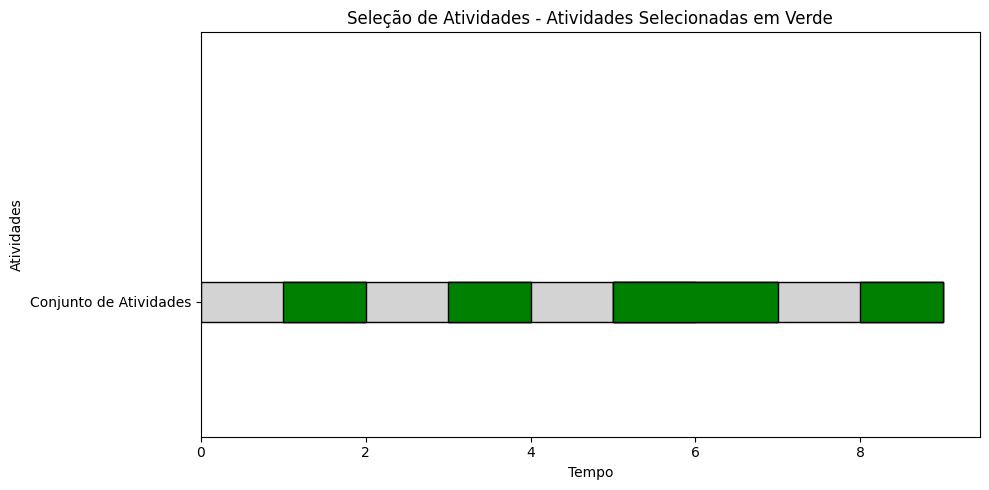

In [ ]:
# Plot dos resultados
plt.figure(figsize=(10,5))
y_level = 1  # Para posicionar as barras das atividades
height = 0.3

# Plotar todas as atividades em uma cor neutra
for s, f in zip(starts, finishes):
    plt.barh(y_level, f - s, left=s, height=height, color='lightgray', edgecolor='black')

# Destacar as atividades selecionadas em outra cor
for s, f in selected:
    plt.barh(y_level, f - s, left=s, height=height, color='green', edgecolor='black')

plt.xlabel('Tempo')
plt.ylabel('Atividades')
plt.title('Seleção de Atividades - Atividades Selecionadas em Verde')

# Ajusta o eixo Y para caber a barra
plt.yticks([y_level], ["Conjunto de Atividades"])
plt.ylim(y_level - 1, y_level + 2)
plt.tight_layout()
plt.show()

### 2.1.3 Problema das moedas ou troco mínimo

**Introdução**  
O problema das moedas (ou troco mínimo) é um problema clássico em algoritmos gulosos. Ele envolve determinar o menor número de moedas necessárias para alcançar um determinado valor, dado um conjunto de denominações de moedas.  
  
**Descrição**  
- Dado:
    - Um conjunto de denominações de moedas (por exemplo, [1, 5, 10, 25] para moedas de centavos).
    - Um valor-alvo (por exemplo, 63 centavos).
- Objetivo:
    - Encontrar a combinação de moedas que totalize exatamente o valor-alvo utilizando o menor número possível de moedas.
- Abordagem Gulosa:
    - Ordenar as moedas em ordem decrescente de valor.
    - Escolher a moeda de maior denominação possível para o restante do valor.
    - Repetir até alcançar o valor-alvo.
---
**Implementação**  
1. **Ordenação Decrescente**  
As moedas são ordenadas em ordem decrescente para que o algoritmo guloso escolha primeiro as moedas de maior valor.

2. **Escolha Gulosa**  
Para cada moeda, o número máximo possível dessa denominação é usado (amount // coin). Isso reduz imediatamente o valor restante (amount -= count * coin).

3. **Validação do Resultado**  
Se ao final o valor restante (amount) não for zero, significa que não é possível atingir exatamente o valor-alvo com as moedas disponíveis.

4. **Retorno**  
O número total de moedas e a combinação (moeda, quantidade) são retornados.
---
**Exemplo de execução**  
- **Entrada:**  
    - Moedas: $[1, 5, 10, 25]$
    - Valor: $63$

- **Passos do Algoritmo:**  
    - Escolhe 2 moedas de 25 centavos (valor restante: $63 - 50 = 13$).
    - Escolhe 1 moeda de 10 centavos (valor restante: $13 - 10 = 3$).
    - Escolhe 3 moedas de 1 centavo (valor restante: $3 - 3 = 0$).

- **Saída:**  
    - Número mínimo de moedas: $6$
    - Combinação: $[(25, 2), (10, 1), (1, 3)]$

In [ ]:
def coin_change_greedy_recursive(coins, amount, index=0, count=0):
    """
    Resolve o problema das moedas recursivamente usando uma abordagem gulosa.
    :param coins: Lista de denominações ordenadas em ordem decrescente.
    :param amount: Valor restante a ser atingido.
    :param index: Índice da moeda atual a ser considerada.
    :param count: Contador de moedas utilizadas até agora.
    :return: Número mínimo de moedas usadas ou float('inf') se não for possível.
    """
    # Caso base: valor restante é 0, solução encontrada
    if amount == 0:
        return count

    # Caso base: índice fora da lista ou valor restante negativo (solução inválida)
    if index >= len(coins) or amount < 0:
        return float('inf')
# coins = [1, 5, 10, 25]
# amount = 63, index = 0, count = 0
# max_coins_for_this_denomination = 63 // 25 = 2
    # amount = 13, index = 1, count = 2
    # max_coins_for_this_denomination = 13 // 10 = 1
        # amount = 3, index = 2, count = 3
        # max_coins_for_this_denomination = 3 // 1 = 3
            # amount = 0, index = 3, count = 6
    # Escolha gulosa: pega o maior número possível da moeda atual
    max_coins_for_this_denomination =amount // coins[index]

    # Chama recursivamente para cada número de moedas possível dessa denominação
    best = float('inf')
    for i in range(max_coins_for_this_denomination + 1):
        # Reduz a quantidade do valor restante e chama a função recursiva
        new_count = count + i
        new_amount = amount - i * coins[index]
        result = coin_change_greedy_recursive(coins, new_amount, index + 1, new_count)
        best = min(best, result)

    return best

# Wrapper para ordenar as moedas antes da recursão
def coin_change_greedy(coins, amount):
    # Ordena as moedas em ordem decrescente para garantir a escolha gulosa
    coins.sort(reverse = True)
    result = coin_change_greedy_recursive(coins, amount)
    return result if result != float('inf') else -1

In [ ]:
def coin_change(coins, amount):
    """
    Encontra o número mínimo de moedas para atingir um determinado valor.
    :param coins: Lista de denominações das moedas.
    :param amount: Valor-alvo.
    :return: Número total de moedas usadas e a combinação de moedas.
    """
    # Ordena as moedas em ordem decrescente
    coins.sort(reverse=True)

    # Inicializa as variáveis
    num_coins =   0# Contador do número total de moedas usadas
    result =    []  # Lista para armazenar a combinação de moedas

    for coin in coins:
        # Calcula quantas moedas dessa denominação podem ser usadas
         # se contagem for maior que 0
        count = amount // coin
        if count > 0:
            result.append((coin, count))
            num_coins += count   # Atualiza o número total de moedas usadas
            amount -= count * coin  # Reduz o valor restante

        # Se o valor restante for zero, termina o processo
        if amount == 0:
            break

    # Caso não seja possível formar o valor exatamente (exemplo: moedas insuficientes)
    if amount > 0:
        return -1, []  # Retorna -1 indicando que não foi possível atingir o valor

    return num_coins, result

In [ ]:
def coin_change(coins, amount):
    """
    Encontra o número mínimo de moedas para atingir um determinado valor.
    :param coins: Lista de denominações das moedas.
    :param amount: Valor-alvo.
    :return: Número total de moedas usadas e a combinação de moedas.
    """
    # Ordena as moedas em ordem decrescente
    coins.sort(reverse=True)

    # Inicializa as variáveis
    num_coins = 0  # Contador do número total de moedas usadas
    result = []  # Lista para armazenar a combinação de moedas

    for coin in coins:
        # Calcula quantas moedas dessa denominação podem ser usadas
        count = amount // coin
        if count > 0:
            result.append((coin, count))  # Adiciona a moeda e sua quantidade na solução
            num_coins += count  # Atualiza o número total de moedas usadas
            amount -= count * coin  # Reduz o valor restante

        # Se o valor restante for zero, termina o processo
        if amount == 0:
            break

    # Caso não seja possível formar o valor exatamente (exemplo: moedas insuficientes)
    if amount > 0:
        return -1, []  # Retorna -1 indicando que não foi possível atingir o valor

    return num_coins, result


In [ ]:
# Exemplo de uso
coins = [1, 5, 10, 25]
amount = 63
num_coins, combination = coin_change(coins, amount)

print("Número mínimo de moedas:", num_coins)
# RESPOSTA ESPERADA
# Número mínimo de moedas: 6
print("Combinação de moedas:")
for coin, count in combination:
    print(f"{count} moeda(s) de {coin}")
    # RESPOSTA ESPERADA
    # 2 moeda(s) de 25
    # 1 moeda(s) de 10
    # 3 moeda(s) de 1

result = coin_change_greedy(coins, amount)
print("Número mínimo de moedas (guloso e recursivo):", result)
# RESPOSTA ESPERADA
# Número mínimo de moedas (guloso e recursivo): 6


Número mínimo de moedas: 6
Combinação de moedas:
2 moeda(s) de 25
1 moeda(s) de 10
3 moeda(s) de 1
Número mínimo de moedas (guloso e recursivo): 6


### 2.1.4 Algoritmo de Dijkstra

**Introdução**  
O algoritmo de Dijkstra é um algoritmo guloso utilizado para encontrar o caminho mais curto entre um vértice de origem e todos os outros vértices em um grafo ponderado com pesos não negativos.  
Ele foi desenvolvido por Edsger W. Dijkstra em 1956 e é amplamente utilizado em problemas relacionados a redes, como:  -
- Planejamento de rotas (GPS, transporte, logística).
- Redes de computadores (roteamento de pacotes).
- Circuitos eletrônicos e problemas de infraestrutura.
  
**Descrição**  
- Entrada:
    - Um grafo representado como uma lista de vértices e arestas, onde cada aresta possui um peso positivo.
    - Um vértice de origem $S(source)$.
- Saída:
    - A menor distância do vértice de origem $S$ até todos os outros vértices no grafo.
    - Opcionalmente, o caminho percorrido para alcançar cada vértice.
- Abordagem Gulosa:
    - A cada passo, o algoritmo escolhe o vértice não processado com a menor distância acumulada.
    - Atualiza as distâncias de todos os vizinhos desse vértice, se encontrar um caminho mais curto.
    - Uma vez processado, o vértice é considerado "finalizado" e não será revisitado.
- Repetição:
   - O processo se repete até que todos os vértices tenham sido processados.
---
**Implementação**  
1. **Inicialização**  
    - Inicialize todos os valores com infinito $(∞)$ ou $float('inf')$, exceto o vértice de origem, que terá distância 0.  
    - A lista unvisited contém todos os vértices do grafo.

2. **Seleção do Vértice com Menor Distância**  
    - A cada iteração, o algoritmo encontra o vértice não processado com a menor distância acumulada usando a função $min()$ aplicada sobre a lista $unvisited$.
        - A função $min()$ retorna o menor elemento de uma lista com base em um critério.
        - O parâmetro $key$ é usado para especificar uma função que determina como os elementos serão comparados
        - A expressão **lambda vertex: distances[vertex]** é uma função anônima que recebe um vertex como entrada e retorna $distances[vertex]$ (a distância acumulada do vértice até a origem).
        - Exemplo:
```    
# Exemplo simples de min()
lista = [5, 3, 8, 1]
menor = min(lista)
print(menor)  # Saída: 1

# Parâmetro key
key=lambda vertex: distances[vertex]

# Exemplo com key e Lambda Function
lista = ['a', 'bbb', 'cc']
menor = min(lista, key=len)  # Menor com base no comprimento
print(menor)  # Saída: 'a'

```  
3. **Relaxamento de Arestas**  
Para cada vizinho do vértice atual, verifica se passar pelo vértice atual diminui a distância do vizinho. Se sim, atualiza a distância

4. **Marcar como Visitado**  
O vértice processado é removido da lista $unvisited$, garantindo que ele não será revisitado.

5. **Repetição**  
O processo continua até que todos os vértices tenham sido processados (a lista unvisited esteja vazia).

---

In [ ]:
def dijkstra_list(graph, start):
    """
    Encontra os menores caminhos de um vértice de origem para todos os outros usando Dijkstra.
    Implementação usando lista simples em vez de fila de prioridade.

    :param graph: Grafo representado como lista de adjacência {vértice: [(vizinho, peso), ...]}
    :param start: Vértice de origem
    :return: Dicionário com menores distâncias para cada vértice
    """
    # Inicializa as distâncias com infinito

    distances = {vertex: float('inf') for vertex in graph}
    distances[start] =   0 # Distância da origem para ela mesma é 0

    # Lista de vértices não processados
    unvisited = list(graph.keys())

    while unvisited:
        # Encontra o vértice não processado com a menor distância acumulada
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        # Remove o vértice selecionado da lista de não processados
        unvisited.remove(current_vertex)


        # Atualiza as distâncias dos vizinhos do vértice atual
        for neighbor, weight in graph[current_vertex]:
            # Calcula a nova distância acumulada para o vizinho
            new_distance = distances[current_vertex] + weight

            # Atualiza se a nova distância for menor que a distância atual
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance

    return distances
# A = 0, B = 2, C = 3, D = 9, E = 6
#
# Exemplo de Grafo
graph = {
    'A': [('B', 2), ('C', 4)],
    'B': [('A', 2), ('C', 1), ('D', 7)],
    'C': [('A', 4), ('B', 1), ('E', 3)],
    'D': [('B', 7), ('E', 1)],
    'E': [('C', 3), ('D', 1)],
}

# Cidade Origem
start_city = 'A'
shortest_paths = dijkstra_list(graph, start_city)

# Imprime os resultados
print("Menor distância da cidade", start_city)
for city, distance in shortest_paths.items():
    print(f"Para {city}: {distance}")

# RESPOSTA ESPERADA
# Menor distância da cidade A
# Para A: 0
# Para B: 2
# Para C: 3
# Para D: 7
# Para E: 6

Menor distância da cidade A
Para A: 0
Para B: 2
Para C: 3
Para D: 7
Para E: 6


Para que o algoritmo de Dijkstra retorne não apenas as menores distâncias, mas também os caminhos percorridos, precisamos adicionar uma estrutura para rastrear os vértices predecessores. A partir desses predecessores, podemos reconstruir o caminho final ao final do algoritmo.

**Modificações Necessárias**
- Predecessores
    - Adicionaremos um dicionário predecessors que armazena o "pai" de cada vértice no caminho mais curto.
- Reconstrução do Caminho:
    - Após calcular as menores distâncias, usaremos o dicionário de predecessores para reconstruir o caminho do vértice de origem até qualquer outro vértice.

In [ ]:
import math
def dijkstra_list(graph, start):
    """
    Encontra os menores caminhos de um vértice de origem para todos os outros usando Dijkstra.
    Retorna as menores distâncias e os caminhos percorridos.

    :param graph: Grafo representado como lista de adjacência {vértice: [(vizinho, peso), ...]}
    :param start: Vértice de origem
    :return: Dicionário com menores distâncias e dicionário de predecessores para reconstruir os caminhos
    """
    # Inicializa as distâncias com infinito
    distances = {vertex: math.inf for vertex in graph}

    # Distância da origem para ela mesma é 0
    distances[start] = 0

    # Dicionário para rastrear o "pai" de cada vértice no caminho mais curto
    predecessors = {vertex: None for vertex in graph}

    # Cria Lista de vértices não processados
    unprocessed_vertices = list(graph.keys())

    # Enquanto houver vértices não processados
    while unprocessed_vertices:
        # Encontra o vértice não processado com a menor distância acumulada
        current_vertex = min(unprocessed_vertices, key=lambda vertex: distances[vertex])

        # Remove o vértice selecionado da lista de não processados
        unprocessed_vertices.remove(current_vertex)

        # Atualiza as distâncias dos vizinhos do vértice atual
        for neighbor, weight in graph[current_vertex]:
            # Calcula a nova distância acumulada para o vizinho
            new_distance = distances[current_vertex] + weight

            # Atualiza se a nova distância for menor que a distância atual
            if new_distance < distances[neighbor]:
                # Atualiza a distância do vizinho
                distances[neighbor] = new_distance

                # Atualiza o "pai" do vizinho
                predecessors[neighbor] = current_vertex


    # Retorna as distâncias e os predecessores
    return distances, predecessors

def reconstruct_path(predecessors, start, end):
    """
    Reconstrói o caminho do vértice de origem até o vértice de destino usando predecessores.
    :param predecessors: Dicionário com os predecessores de cada vértice.
    :param start: Vértice de origem.
    :param end: Vértice de destino.
    :return: Lista com o caminho do início até o fim.
    """
    # Cria uma lista para armazenar o caminho
    path = []
    # Começa pelo vértice de destino
    current_vertex = end

    # Enquanto houver vértices anteriores a visitar (não chegou ao início)
    while current_vertex is not None and current_vertex != start:
        # Adiciona o vértice atual ao caminho
        path.append(current_vertex)

        # Move para o vértice anterior
        current_vertex = predecessors[current_vertex]

        # Inverte o caminho para que fique do início até o fim
        path.reverse()

        # Se o caminho não começa no vértice de origem, não existe caminho
        if path and path[0] != start:
            return []

    return path

# Exemplo de Grafo
graph = {
    'A': [('B', 2), ('C', 4)],
    'B': [('A', 2), ('C', 1), ('D', 7)],
    'C': [('A', 4), ('B', 1), ('E', 3)],
    'D': [('B', 7), ('E', 1)],
    'E': [('C', 3), ('D', 1)],
}

# Cidade Origem
start_city = 'A'
shortest_distances, predecessors = dijkstra_list(graph, start_city)

# Imprime os resultados
print("Menor distância da cidade", start_city)
for city, distance in shortest_distances.items():
    print(f"Para {city}: {distance}")
    path = reconstruct_path(predecessors, start_city, city)
    print(f"  Caminho: {' -> '.join(path)}")

# RESPOSTA ESPERADA
# Menor distância da cidade A
# Para A: 0
#   Caminho: A
# Para B: 2
#   Caminho: A -> B
# Para C: 3
#   Caminho: A -> B -> C
# Para D: 7
#   Caminho: A -> B -> C -> E -> D
# Para E: 6
#   Caminho: A -> B -> C -> E

Menor distância da cidade A
Para A: 0
  Caminho: 
Para B: 2
  Caminho: 
Para C: 3
  Caminho: 
Para D: 7
  Caminho: 
Para E: 6
  Caminho: 


In [ ]:
import math

def dijkstra_list(graph, start):
    """
    Encontra os menores caminhos de um vértice de origem para todos os outros usando Dijkstra.
    Retorna as menores distâncias e os caminhos percorridos.

    :param graph: Grafo representado como lista de adjacência {vértice: [(vizinho, peso), ...]}
    :param start: Vértice de origem
    :return: Dicionário com menores distâncias e dicionário de predecessores para reconstruir os caminhos
    """
    # Inicializa as distâncias com infinito
    distances = {vertex: math.inf for vertex in graph}

    # Distância da origem para ela mesma é 0
    distances[start] = 0

    # Dicionário para rastrear o "pai" de cada vértice no caminho mais curto
    predecessors = {vertex: None for vertex in graph}

    # Cria Lista de vértices não processados
    unprocessed_vertices = list(graph.keys())

    # Enquanto houver vértices não processados
    while unprocessed_vertices:
        # Encontra o vértice não processado com a menor distância acumulada
        current_vertex = min(unprocessed_vertices, key=lambda vertex: distances[vertex])

        # Se a menor distância for infinita, não há mais caminhos alcançáveis
        if distances[current_vertex] == math.inf:
            break

        # Remove o vértice selecionado da lista de não processados
        unprocessed_vertices.remove(current_vertex)

        # Atualiza as distâncias dos vizinhos do vértice atual
        for neighbor, weight in graph[current_vertex]:
            # Calcula a nova distância acumulada para o vizinho
            new_distance = distances[current_vertex] + weight

            # Atualiza se a nova distância for menor que a distância atual
            if new_distance < distances[neighbor]:
                # Atualiza a distância do vizinho
                distances[neighbor] = new_distance

                # Atualiza o "pai" do vizinho
                predecessors[neighbor] = current_vertex

    # Retorna as distâncias e os predecessores
    return distances, predecessors

def reconstruct_path(predecessors, start, end):
    """
    Reconstrói o caminho do vértice de origem até o vértice de destino usando predecessores.
    :param predecessors: Dicionário com os predecessores de cada vértice.
    :param start: Vértice de origem.
    :param end: Vértice de destino.
    :return: Lista com o caminho do início até o fim.
    """
    # Cria uma lista para armazenar o caminho
    path = []
    # Começa pelo vértice de destino
    current_vertex = end

    # Enquanto houver vértices anteriores a visitar (não chegou ao início)
    while current_vertex is not None and current_vertex != start:
        # Adiciona o vértice atual ao caminho
        path.append(current_vertex)

        # Move para o vértice anterior
        current_vertex = predecessors[current_vertex]

    # Adiciona o vértice de origem ao caminho, se ele existir
    if current_vertex == start:
        path.append(start)

    # Inverte o caminho para que fique do início até o fim
    path.reverse()

    # Se o caminho não começa no vértice de origem, não existe caminho
    if path and path[0] != start:
        return []

    return path

# Exemplo de Grafo
graph = {
    'A': [('B', 2), ('C', 4)],
    'B': [('A', 2), ('C', 1), ('D', 7)],
    'C': [('A', 4), ('B', 1), ('E', 3)],
    'D': [('B', 7), ('E', 1)],
    'E': [('C', 3), ('D', 1)],
}

# Cidade Origem
start_city = 'A'
shortest_distances, predecessors = dijkstra_list(graph, start_city)

# Imprime os resultados
print("Menor distância da cidade", start_city)
for city, distance in shortest_distances.items():
    print(f"Para {city}: {distance}")
    path = reconstruct_path(predecessors, start_city, city)
    print(f"   Caminho: {' -> '.join(path)}")

Menor distância da cidade A
Para A: 0
   Caminho: A
Para B: 2
   Caminho: A -> B
Para C: 3
   Caminho: A -> B -> C
Para D: 7
   Caminho: A -> B -> C -> E -> D
Para E: 6
   Caminho: A -> B -> C -> E


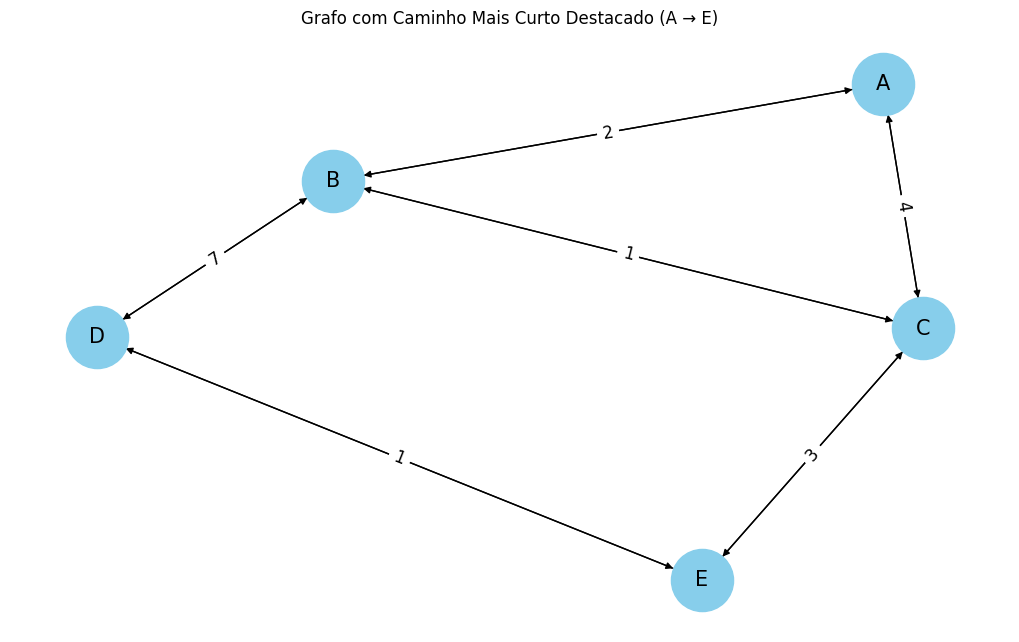

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

nx.DiGraph(): #Cria um grafo direcionado usando a biblioteca NetworkX.
# Em um grafo direcionado, as arestas têm uma direção: de um nó origem para um nó destino.
G = nx.DiGraph()
# for node, edges in graph.items(): Itera sobre os vértices (node) e suas respectivas arestas (edges) no dicionário do grafo.
for node, edges in graph.items():
    # for neighbor, weight in edges: Para cada aresta, obtém o vizinho (neighbor) e o peso (weight) da conexão.
    for neighbor, weight in edges:
        # G.add_edge(node, neighbor, weight=weight): Adiciona uma aresta direcionada no grafo G entre o vértice node e o neighbor com o peso especificado.
        G.add_edge(node, neighbor, weight=weight)

# nx.spring_layout(G): Gera as posições dos nós no plano 2D usando o layout "Spring"
pos = nx.spring_layout(G)
# G.edges(data=True): Retorna todas as arestas com seus atributos (neste caso, o peso).
# {(u, v): d['weight'] for u, v, d in G.edges(data=True)}: Cria um dicionário com as arestas e seus pesos.
# A chave (u, v) representa a aresta entre os nós u e v. O valor d['weight'] é o peso da aresta.
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(10, 6))
# nx.draw(G, pos, ...): Desenha o grafo G com as posições definidas em pos.
# with_labels=True: Mostra os rótulos dos nós.
# node_size=2000: Define o tamanho dos nós.
# node_color='skyblue': Define a cor dos nós.
# edgecolors='black': Define a cor da borda dos nós.
# font_size=15: Define o tamanho da fonte dos rótulos.
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_color='black')
# nx.draw_networkx_edge_labels: Desenha os rótulos (pesos) das arestas no grafo.
# edge_labels: Dicionário com as arestas e seus pesos.
# pos: Posições dos nós.
# font_size=12: Define o tamanho da fonte dos rótulos das arestas.
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# if path: Verifica se o caminho mais curto (path) foi encontrado.
if path:
    # Cria uma lista edges_in_path que contém todas as arestas no caminho mais curto.
    # Cada aresta é representada como uma tupla (path[i], path[i + 1]), onde path[i] e path[i + 1] são nós consecutivos no caminho.
    edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    # nx.draw_networkx_edges: Desenha apenas as arestas especificadas em edgelist (neste caso, as do caminho mais curto).
    # edge_color='red': Define a cor das arestas do caminho mais curto como vermelho.
    # width=3: Define a largura das arestas do caminho mais curto como 3.
    # edgelist=edges_in_path: Lista de arestas que compõem o caminho mais curto.
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=3)

plt.title("Grafo com Caminho Mais Curto Destacado (A → E)")
plt.show()

## 2.2 Algoritmo A*

---  

**Objetivos da Aula**

- Entender os conceitos básicos de busca informada na Inteligência Artificial.
- Estudar o funcionamento do Algoritmo A*.
- Compreender as características de admissibilidade e otimalidade do A*.
- Implementar o algoritmo A* em um exemplo prático de busca de caminho mais curto.
---

### 2.2.1 **Introdução**

O **Algoritmo A\*** é uma técnica de **busca informada** usada para encontrar o **caminho mais curto** em grafos ponderados. Ele combina:
- O **custo real acumulado** até o nó atual $ g(n) $.
- A **heurística admissível** $ h(n) $, que estima o custo restante até o destino.

Para cada nó $n$, o $A^*$ calcula o valor da função de avaliação:

$$
f(n) = g(n) + h(n)
$$

- **$ f(n) $**: Estimativa do custo total para alcançar o destino passando pelo nó $ n $.
- **$ g(n) $**: Custo real acumulado do nó inicial até $ n $.
- **$ h(n) $**: Estimativa do custo do nó $ n $ até o destino.

O $A^*$ expande sempre o nó com o **menor valor de $ f(n) $**.  

---

### 2.2.2 **Propriedades do A\***

1. **Admissibilidade:**  
   - A função heurística $h(n)$  é uma estimativa do custo para chegar do nó $n$ até o objetivo. Ela não é fornecida automaticamente; é algo que você precisa definir de acordo com o problema que está tentando resolver.
   - A heurística $ h(n) $ é **admissível** se ela **nunca superestima** o custo real para alcançar o destino.
   - Ou seja, $h(n)$ deve sempre ser **menor ou igual** ao verdadeiro custo mínimo de $n$ até o objetivo.

2. **Otimalidade:**  
   O $A^*$ encontra o **caminho ótimo** quando a heurística é admissível.

3. **Consistência:**  
   Em essência, uma heurística $h$ é consistente se, para qualquer nó $n$ e um de seus sucessores $n'$, a seguinte desigualdade é satisfeita:
$$
h(n) \leq custo(n, n') + h(n')
$$
  
onde $custo(n, n')$ é o custo para ir de $n$ para $n'$. O que isso significa na prática?

- Interpretação Geométrica (Como se fosse uma distância)
   - Pense em h como uma função que "mede" a distância (ou custo) estimada até o objetivo.
   - Se h fosse realmente uma distância no espaço, então seria coerente que a distância de n até o objetivo não pudesse ser maior do que a distância de n até n' mais a distância de n' até o objetivo. Caso contrário, teríamos uma espécie de "atalho" que a heurística não consegue prever.
- Garantia de Não Reabertura de Nós
   - Uma heurística consistente assegura que, quando o A* extrai um nó n da sua lista de nós a serem explorados (a "open list") para expansão, o valor g(n) (o custo real para chegar até n) encontrado naquele momento já é o melhor possível
   - Ou seja, f(n) = g(n) + h(n) nunca diminuirá ao se avançar pelo grafo
   - Logo, não existe a necessidade de "revisitar" n no futuro com um custo melhor, uma vez que não há caminho mais curto que contraria a função h
      - Em outras palavras, a consistência garante que, após expandir um nó, a melhor rota para aquele nó já foi encontrada
      - Portanto, não haverá um momento posterior no algoritmo em que você encontre um caminho mais barato para chegar naquele nó

**Exemplos**
1. **Problema de Rotas em Mapas (Ex: Cidades e Distâncias)**
    - Se você quer ir de uma cidade a outra em um mapa real, uma boa heurística é a distância em linha reta (distância euclidiana) entre o nó atual e o objetivo.
    - Isso porque a distância em linha reta geralmente será menor ou igual à distância real ao longo das estradas (o que garante admissibilidade).
1. **Grafos Genéricos sem Informação Geográfica**
    - Se você não possui informação extra sobre o grafo, definir uma heurística admissível pode ser complicado.
    - Às vezes se usa h(n) = 0 para todos os nós, o que degenera o A* para um Dijkstra (menos eficiente, mas ainda funciona).
    - Em outros casos, se há alguma função que aproxima a dificuldade ou custo restante, pode-se usar essa aproximação.
    - O importante é que ela não seja maior que o custo real mínimo restante.
---

### 2.2.3 **Aplicação do Algoritmo A\***


Vamos usar o $A^*$ para encontrar o caminho mais curto em um grafo simples.

In [ ]:
import time
import sys

def a_star_no_priority_queue(graph, heuristics, start, goal):
    """
    Implementa o Algoritmo A* para encontrar o caminho mais curto.
    Utiliza uma lista simples em vez de uma fila de prioridades.

    :param graph: Grafo como lista de adjacência {nó: [(vizinho, custo), ...]}
    :param heuristics: Dicionário de heurísticas {nó: h(n)}
    :param start: Nó de partida
    :param goal: Nó objetivo
    :return: O menor caminho e seu custo total
    """
    # Inicializa a lista de nós a serem processados
    # Cada elemento tem o formato (f(n)=g(n)+h(n), g(n), nó atual, caminho percorrido até agora)
    open_list = [(0 + heuristics[start], 0, start, [])]
    # Conjunto para armazenar os nós que já foram visitados
    visited = set()

    # Enquanto houver nós na lista aberta (open_list)
    while open_list:
        # Ordena a lista aberta com base no valor de f(n)
        # f(n) = g(n) + h(n) é o custo total estimado.
        # usar funcao lambda para ordenar a lista aberta pela primeira coluna
        open_list.sort(key=lambda x: x[0])

        # Remove o nó com o menor f(n) da lista aberta
        # Prencher o indice da funcao pop com ...
        f, g, current, path = open_list.pop()

        # Se o nó já foi visitado, pula para o próximo
        if current in visited:
            continue

        # Adiciona o nó atual ao caminho
        path = path + [current]
        # Marca o nó atual como visitado
        visited.add(current)

        # Verifica se o nó atual é o objetivo
        if current == goal:
           return path, g  # Retorna o caminho completo e o custo total

        # Expande os vizinhos do nó atual
        for neighbor, cost in graph[current]:
            # Se o vizinho ainda não foi visitado
            if  neighbor not in visited:
                 # g_new: o novo custo real até o vizinho = g atual + custo da aresta
                g_new = g + cost

                # Calcula o custo total estimado f(n) = g(n) + h(n).
                f_new = g_new + heuristics[neighbor]

                # Adiciona o vizinho à lista aberta com o novo custo e caminho
                open_list.append((f_new, g_new, neighbor, path))

    # Se nenhum caminho for encontrado, retorna None e custo infinito
    return None, float('inf')


# Exemplo de Grafo
graph = {
    'A': [('B', 2), ('C', 4)],  # Nó A conectado a B com custo 2, C com custo 4
    'B': [('A', 2), ('C', 1), ('D', 7)],  # Nó B conectado a A, C e D com os respectivos custos
    'C': [('A', 4), ('B', 1), ('E', 3)],  # Nó C conectado a A, B e E
    'D': [('B', 7), ('E', 1)],  # Nó D conectado a B e E
    'E': [('C', 3), ('D', 1)],  # Nó E conectado a C e D
}

# Dicionário de heurísticas: estimativa do custo de cada nó até o destino (E)
heuristics = {
    'A': 6,  # Estimativa de A até E
    'B': 4,  # Estimativa de B até E
    'C': 2,  # Estimativa de C até E
    'D': 1,  # Estimativa de D até E
    'E': 0,  # Estimativa de E até E (destino)
}

# Definindo o nó inicial e o nó objetivo
start_node = 'A'
goal_node = 'E'

# Executa o algoritmo A* sem fila de prioridades
path, cost = a_star_no_priority_queue(graph, heuristics, start_node, goal_node)

# Imprime o resultado final
print("Caminho mais curto:", " -> ".join(path))  # Imprime o caminho como sequência de nós
# RESPOSTA ESPERADA
# Caminho mais curto: A -> B -> C -> E
print("Custo total:", cost)  # Imprime o custo total do caminho
# RESPOSTA ESPERADA
# Custo total: 6

Caminho mais curto: A -> C -> B -> D -> E
Custo total: 13



**Explicação dos Principais Componentes**  

---

**1. Lista `open_list`**
- A `open_list` armazena os **nós que ainda precisam ser processados**.
- Cada elemento da lista é uma **tupla** com $f(n)$, $g(n)$, nó atual, caminho percorrido.
  1. **$f(n)$:** Custo total estimado $ f(n) = g(n) + h(n) $.
  2. **$g(n)$:** Custo real acumulado até o nó atual.
  3. **Nó atual:** O vértice que está sendo expandido.
  4. **Caminho percorrido:** Lista dos nós já visitados para alcançar o nó atual.

```python
(f(n), g(n), nó atual, caminho percorrido)
```

**2. Ordenação da Lista**
- A lista `open_list` é ordenada em ordem crescente de $f(n)$.
- Isso garante que o nó com o menor custo total estimado seja processado primeiro.
```python
open_list.sort(key=lambda x: x[0])
```

**3. Nó Visitado**
- Os nós já visitados são armazenados em um conjunto chamado `(visited)`.
- Isso evita a revisita de nós, o que tornaria o algoritmo menos eficiente.

```python
visited.add(current)
if current in visited:
    continue
```

**4. Cálculo de f(n)**
$$
f(n) = g(n) + h(n)
$$

```python
g_new = g + cost       # Custo real acumulado
f_new = g_new + heuristics[neighbor]  # Custo total estimado
```

**5. Caminho Encontrado**
- Quando o nó atual coincide com o objetivo, o caminho percorrido e o custo total são retornados.
```python
if current == goal:
    return path, g
```

**6. Caso Sem Solução**
- Se a lista de nós a serem processados ficar vazia e o objetivo não for alcançado, retorna `None` e `float('inf')`.
```python
return None, float('inf')
```


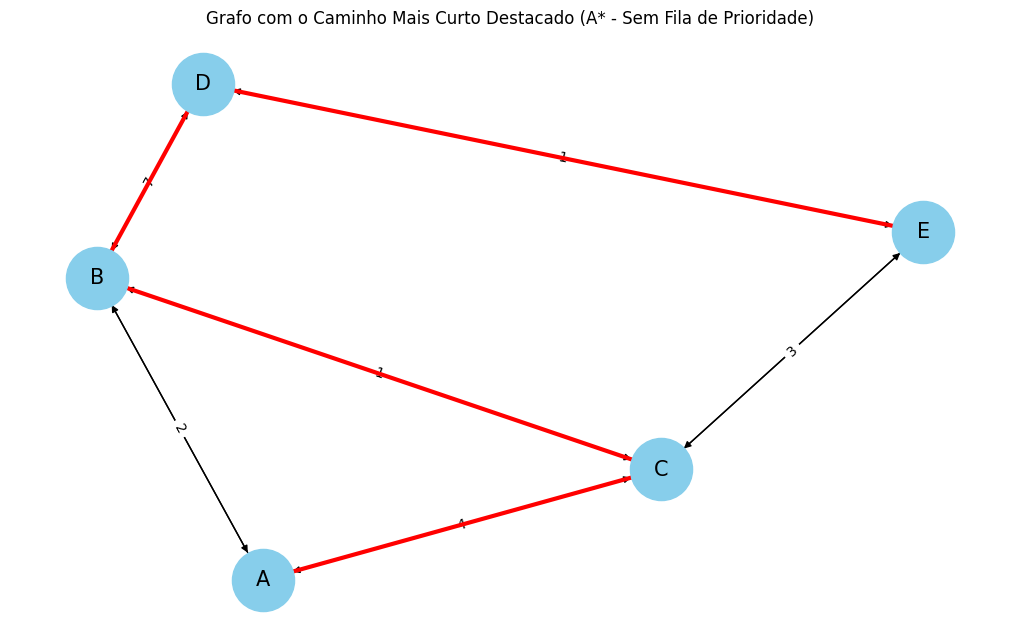

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar o grafo
G = nx.DiGraph()

# Adiciona as arestas ao grafo com os respectivos pesos
for node, edges in graph.items():
    for neighbor, cost in edges:
        G.add_edge(node, neighbor, weight=cost)

# Posicionamento dos nós para visualização
pos = nx.spring_layout(G)

# Destacar as arestas do caminho mais curto
edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]

# Desenhar o grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=3)

# Título do gráfico
plt.title("Grafo com o Caminho Mais Curto Destacado (A* - Sem Fila de Prioridade)")
plt.show()

### **2.2.4 Comparando os algoritmos**

In [ ]:
import time
import sys

# Implementação do Algoritmo A* com cálculo de tempo e memória
def a_star_no_priority_queue(graph, heuristics, start, goal):
    """
    Implementa o Algoritmo A* para encontrar o caminho mais curto.
    Utiliza uma lista simples em vez de uma fila de prioridades.

    :param graph: Grafo como lista de adjacência {nó: [(vizinho, custo), ...]}
    :param heuristics: Dicionário de heurísticas {nó: h(n)}
    :param start: Nó de partida
    :param goal: Nó objetivo
    :return: O menor caminho, seu custo total, tempo de execução e memória utilizada
    """
    start_time = time.time()  # Inicia a contagem do tempo
    memory_usage = 0  # Inicializa o uso de memória
    open_list = [(0 + heuristics[start], 0, start, [])]
    visited = set()

    while open_list:
        open_list.sort(key=lambda x: x[0])
        f, g, current, path = open_list.pop(0)
        memory_usage += sys.getsizeof(open_list) + sys.getsizeof(visited) + sys.getsizeof(path)  # Cálculo da memória

        if current in visited:
            continue

        path = path + [current]
        visited.add(current)

        if current == goal:
            end_time = time.time()
            execution_time = end_time - start_time
            return path, g, execution_time, memory_usage  # Retorna com tempo e memória

        for neighbor, cost in graph[current]:
            if neighbor not in visited:
                g_new = g + cost
                f_new = g_new + heuristics[neighbor]
                open_list.append((f_new, g_new, neighbor, path))

    end_time = time.time()
    execution_time = end_time - start_time
    return None, float('inf'), execution_time, memory_usage


# Implementação do Dijkstra com tempo e memória
def dijkstra(graph, start, goal):
    """
    Implementa o Algoritmo de Dijkstra para encontrar o caminho mais curto.

    :param graph: Grafo como lista de adjacência {nó: [(vizinho, custo), ...]}
    :param start: Nó de partida
    :param goal: Nó objetivo
    :return: O menor caminho, seu custo total, tempo de execução e memória utilizada
    """
    start_time = time.time()  # Inicia a contagem do tempo
    memory_usage = 0  # Inicializa o uso de memória
    distances = {node: float('inf') for node in graph}
    predecessors = {node: None for node in graph}
    distances[start] = 0
    unvisited = list(graph.keys())

    while unvisited:
        current = min(unvisited, key=lambda node: distances[node])
        memory_usage += sys.getsizeof(unvisited) + sys.getsizeof(distances)  # Cálculo da memória

        if distances[current] == float('inf') or current == goal:
            break

        unvisited.remove(current)

        for neighbor, cost in graph[current]:
            new_distance = distances[current] + cost
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current

    # Reconstrução do caminho
    path = []
    current = goal
    while predecessors[current] is not None:
        path.insert(0, current)
        current = predecessors[current]
    if path:
        path.insert(0, start)

    end_time = time.time()
    execution_time = end_time - start_time
    return path, distances[goal], execution_time, memory_usage


# Comparação entre A* e Dijkstra
a_star_path, a_star_cost, a_star_time, a_star_memory = a_star_no_priority_queue(graph, heuristics, start_node, goal_node)
dijkstra_path, dijkstra_cost, dijkstra_time, dijkstra_memory = dijkstra(graph, start_node, goal_node)

# Resultados
print("**Algoritmo A***")
print("Caminho mais curto:", " -> ".join(a_star_path))
print("Custo total:", a_star_cost)
print("Tempo de execução (s):", a_star_time)
print("Memória utilizada (bytes):", a_star_memory)

print("\n**Algoritmo de Dijkstra**")
print("Caminho mais curto:", " -> ".join(dijkstra_path))
print("Custo total:", dijkstra_cost)
print("Tempo de execução (s):", dijkstra_time)
print("Memória utilizada (bytes):", dijkstra_memory)


**Algoritmo A***
Caminho mais curto: A -> B -> C -> E
Custo total: 6
Tempo de execução (s): 4.8160552978515625e-05
Memória utilizada (bytes): 1832

**Algoritmo de Dijkstra**
Caminho mais curto: A -> B -> C -> E
Custo total: 6
Tempo de execução (s): 4.315376281738281e-05
Memória utilizada (bytes): 1168


Em um grafo pequeno, certas operações (como sorting) podem ser mais custosas do que a redução no número de nós visitados. Em problemas maiores, onde o A* com uma boa heurística reduza drasticamente o espaço de busca, a tendência é que o A* supere o Dijkstra em desempenho.

No nosso exemplo, testamos com um grafo pequeno e uma heurística que não reduz o espaço de busca (afinal, h é próxima de zero ou não está fornecendo benefício). Isso faz com que Dijkstra apareça mais rápido e consuma menos memória no teste.